# Memology - DataScience & Memes
![](http://orig07.deviantart.net/3e62/f/2015/267/4/1/meme_team_logo_png_smol_by_kuiwi-d9ass0h.png)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import seaborn as sn
from pylab import rcParams      
rcParams['figure.figsize'] = 8, 8
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [3]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

###  Часть 1. Описание набора данных и признаков

In [6]:
memes = pd.read_csv('data/MEMES_new_short.csv', index_col=0)

In [8]:
memes.shape

(4206, 14)

In [7]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [11]:
memes.reset_index(drop=True, inplace=True)

In [12]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206 entries, 0 to 4205
Data columns (total 14 columns):
name            4206 non-null object
status          4206 non-null object
type            1786 non-null object
origin_year     4206 non-null object
origin_place    4205 non-null object
date_added      4206 non-null object
views           4206 non-null int64
videos          4206 non-null int64
photos          4206 non-null int64
comments        4206 non-null int64
tags            4205 non-null object
about           3798 non-null object
origin          2524 non-null object
other_text      3508 non-null object
dtypes: int64(4), object(10)
memory usage: 460.1+ KB


Итак, пройдемся по переменным:

- name - название мема
- added - дата добавления
- views - число просмотров на сайте
- comments - число комментариев
- status - категориальная переменная, статус присваивается на сайте в зависимости от "одобрения" мема сообществом
- year - год, к которому относится первоисточник появления картинки (например, год выхода определенной серии Симпсонов)
- tags - тэги, также являются категориями
- about - описание мема
- origin - описание происхождения
- spread - где приобрел особенную популярность

In [13]:
memes.head(3)

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."


In [14]:
memes.tail(3)

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
4203,Because of Parkinson's,Confirmed,NaN,2006,YTMND,2013-09-26T16:26:49-04:00,205323,2,101,61,"michael j. fox, joke, image macro, 4chan, cele...","Because of Parkinson's (also known as ""Michael...",Michel J. Fox is an Canadian–American actor an...,The first instance of Michael J. Fox's equatio...
4204,Paranoid Parrot,Confirmed,Image Macro,2009,r9k,2019-10-31T03:47:02-04:00,416158,2,218,51,"4chan, parrot, paranoia, paranoid parrot, advi...",Paranoid Parrot is an advice animal image macr...,"While the photographer is unknown, the origina...","In 2007, the same image was used to illustrate..."
4205,I Believe You Have My Stapler,Confirmed,Pop Culture Reference,2004,YTMND,2018-04-09T16:28:49-04:00,109512,1,25,29,"movie, catchphrase, film, office space, movie ...",NaN,Office Space was a 1999 comedy by Beavis and B...,Milton Waddams (played by actor Stephen Root) ...


###  Часть 2. Первичный анализ признаков

Конечно же, в первую очередь хочется посмотреть на самый популярный мем

In [15]:
memes[memes.views==memes.views.max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
3958,Me Gusta,Confirmed,Character,2010,4chan,2018-09-27T16:03:51-04:00,9095857,21,518,142,"4chan, rageguy, spinoff, 4 panel comic, me gus...",Me Gusta is a rage comic face that is typicall...,"The colloquial Spanish phrase ""Me Gusta"" was f...","Spread In December 2010, the single topic blog..."


![](http://i2.kym-cdn.com/entries/icons/original/000/013/564/aP2dv.gif)

# Время добавления

Так как в нашем распоряжении есть чудесная переменная `added`, то можно поиграться с ней, преобразовав в понятный питону формат и повытаскивая из него час, день недели и месяца, месяц и год добавления

In [18]:
memes['Timestamp'] = pd.to_datetime(memes['date_added'])

In [27]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления мема на сайт

In [28]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

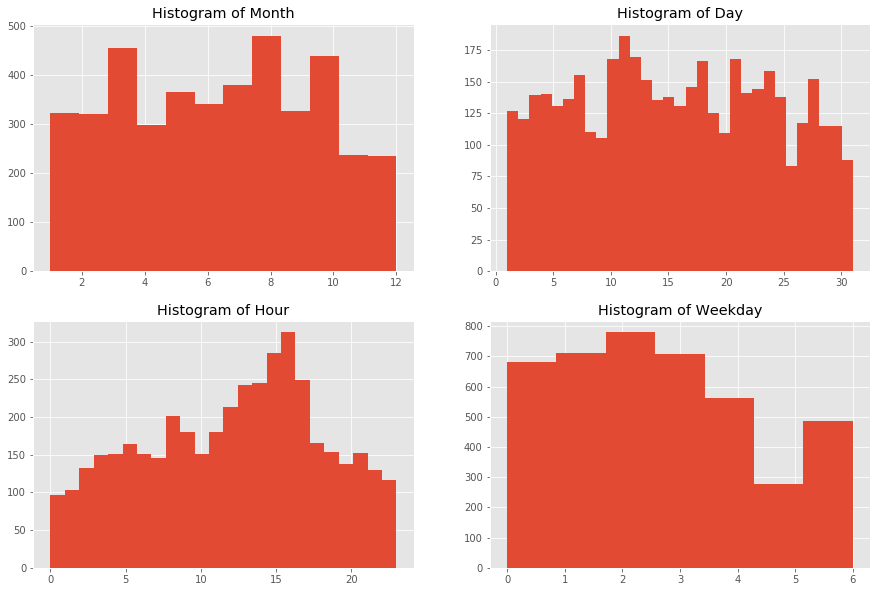

In [29]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

Итак, что тут есть интересного:
- День ничего необычного не принес, распределено достаточно равномерно
- Гистограмма часа достаточно показательная - в ночной период активность значительно снижается, а затем растет, достигая пика примерно после окончания уроков у основной аудитории
- По дням недели есть заметное снижения на выходных, интересно, почему бы это

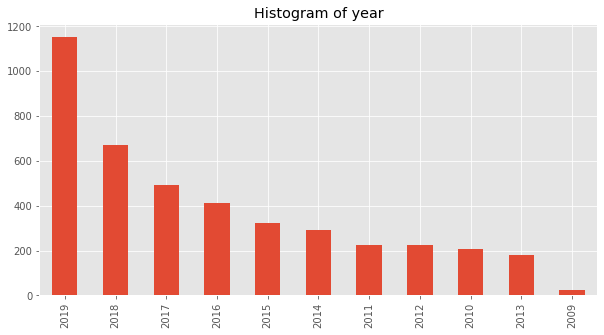

In [30]:
memes.Year.value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Histogram of year")
plt.show()

In [34]:
memes.Year.value_counts(normalize=True).apply(lambda x: "{:.2f}%".format(x*100))

2019    27.41%
2018    15.93%
2017    11.70%
2016     9.77%
2015     7.66%
2014     6.92%
2011     5.37%
2012     5.33%
2010     4.97%
2013     4.33%
2009     0.62%
Name: Year, dtype: object


# Год появления первоисточника

Посмотрим также на вторую переменную, связанную с годом - год появления первоисточника `year`

In [37]:
memes.origin_year.value_counts()[:10]

Unknown    349
2011       329
2016       310
2010       297
2017       281
2013       259
2019       258
2012       236
2014       233
2018       229
Name: origin_year, dtype: int64

In [42]:
memes.tags[memes.tags.isin(['none...', 'none', 'Unknown', 'none... Unknown', 'None'])] = 'unknown'

In [44]:
memes.origin_year.describe()

count    3857.000000
mean     2007.444387
std        35.630976
min      1100.000000
25%      2008.000000
50%      2012.000000
75%      2016.000000
max      2069.000000
Name: origin_year, dtype: float64

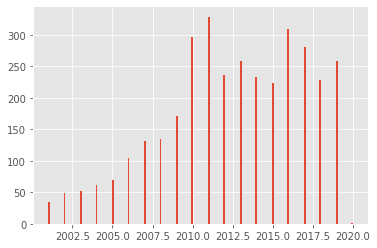

In [56]:
memes.origin_year[(memes.origin_year>2000)&(memes.origin_year<=2020)].hist(bins=200)
plt.show()

Можем посмотреть на наиболее "исторические" мемы, берущие своё начало, например, до 1500 года

In [59]:
ancient = memes[memes.origin_year<1500]
for i in ancient.index.tolist():
    print("Name: {}".format(ancient.loc[i, "name"]))
    print("Year: {}".format(ancient.loc[i, "origin_year"]))
    print("About:\n{}".format(ancient.loc[i, "about"]))
    print("==================================================================\n")

Name: Pascal's Triangle
Year: 1100.0
About:
NOTE: This Entry was related to the 2013 April Fools joke. For more information, please check out the KYMdb Offline Crisis Response Initiative.

Name: Chocolate
Year: 1100.0
About:
Chocolate is a food item known for its sweet taste, its tendency to melt in a hot environment and its all-round delicious nature. Chocolate is typically produced using cocoa solids, sugar and other fats. Milk chocolate, as the name would suggest, is created using milk and is the most common type of chocolate available. In modern culture, chocolate is often lauded as being an incredible food in similar vein to Bacon (which leads to unexpected results when you combine the two)

Name: V Sign
Year: 1415.0
About:
NOTE: This Entry was related to the 2013 April Fools joke. For more information, please check out the KYMdb Offline Crisis Response Initiative.

Name: The Last Supper Parodies
Year: 1495.0
About:
nan

Name: Dented Guitar
Year: 1111.0
About:
1 for the money



# Число просмотров

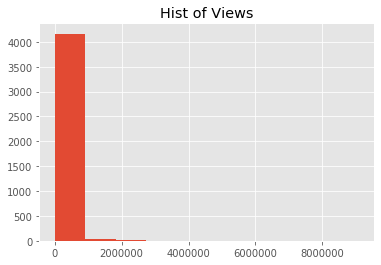

In [60]:
memes.views[memes.views>0].hist(bins=10)
plt.title("Hist of Views")
plt.show()

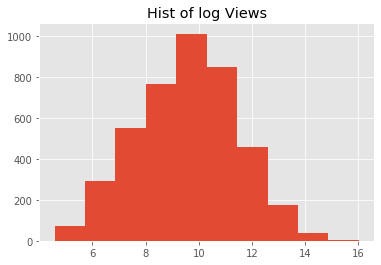

In [61]:
memes.views[memes.views>0].apply(np.log).hist(bins=10)
plt.title("Hist of log Views")
plt.show()

# Популярность

Метрикой популярности, в данном случае, будет оценка среднего числа просмотров в день. Для этого разделим фактическое число просмотров на число дней, прошедших со дня публикации.

In [62]:
memes['average_views'] = memes.views/memes.days_from_creation

In [66]:
memes[memes['average_views']==memes['average_views'].max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,...,origin,other_text,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views
831,Flex Tape,Submission,Advertisement,2017.0,Flex Seal,2019-11-06T14:33:40-05:00,92958,27,77,22,...,"On January 12th, 2017, Flex Seal uploaded a co...","Spread On September 30th, 2017, popular YouTub...",2019-11-06 14:33:40-05:00,2019,11,6,14,2,0.0,inf


In [67]:
index = memes['average_views']==memes['average_views'].max()
memes['average_views'][index] = memes['views'][index]

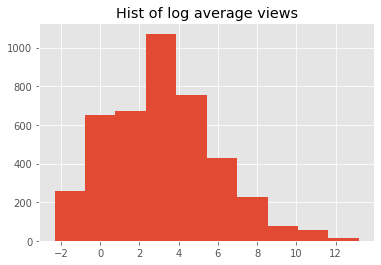

In [68]:
plt.hist(memes.average_views.apply(np.log))
plt.title("Hist of log average views");

### Посмотрим на самые популярные!

In [69]:
popular = memes.sort_values(by='average_views', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'name'])
    print("Average views (per day) {}".format(round(popular.loc[i,'average_views'])))
    print('==============\n')

Meme name: 
Colonel Meow
Average views (per day) 536753.0

Meme name: 
Distracted Boyfriend
Average views (per day) 466923.0

Meme name: 
Derp
Average views (per day) 300836.0

Meme name: 
Need for Speed
Average views (per day) 246737.0

Meme name: 
Shitposting
Average views (per day) 210984.0

Meme name: 
Starter Packs
Average views (per day) 167624.0

Meme name: 
Double D's Facts Book
Average views (per day) 166858.0



# Комментарии

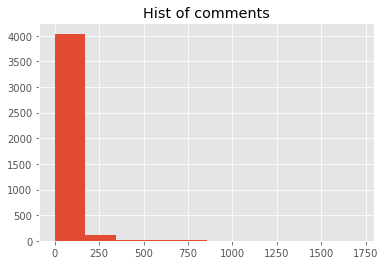

In [72]:
memes.comments.hist()
plt.title("Hist of comments")
plt.show()

### Посмотрим на самые комментируемые

In [73]:
memes['average_comments'] = memes.comments/memes.days_from_creation

In [74]:
index = memes['average_comments']==memes['average_comments'].max()
memes['average_comments'][index] = memes['comments'][index]

In [75]:
popular = memes.sort_values(by='average_comments', ascending=False)
for i in popular.index.tolist()[:7]:
    print('Meme name: ')
    print(popular.loc[i,'name'])
    print("Average comments (per day) {}".format(round(popular.loc[i,'average_comments'])))
    print('==============\n')

Meme name: 
Need for Speed
Average comments (per day) 989.0

Meme name: 
Hero Cat
Average comments (per day) 308.0

Meme name: 
Colonel Meow
Average comments (per day) 302.0

Meme name: 
Miley Cyrus
Average comments (per day) 99.0

Meme name: 
McDonald’s "Happy" Mascot
Average comments (per day) 97.0

Meme name: 
Metro Man Sees Megamind and Roxie
Average comments (per day) 87.0

Meme name: 
Double D's Facts Book
Average comments (per day) 83.0



# Статус

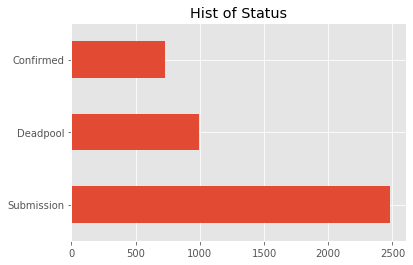

In [76]:
memes.status.value_counts().plot(kind='barh')
plt.title("Hist of Status")
plt.show()

А вот здесь можно попутно решить еще и задачку множественной классификации - для каждого мема есть три состояния:
- Submission - добавлен недавно или не еще не стал "признанным" в сообществе
- Deadpool - если умер и не используется
- Confirmed - активно используется и получил статус "подтвержденного" мема

---



# ML

In [77]:
import nltk
from nltk.corpus import stopwords

In [324]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [361]:
memes["description"] = memes.tags.fillna("")+' '+\
                       memes.about.fillna("")+' '+\
                       memes.origin.fillna("")+' '+\
                       memes.other_text.fillna("")

In [362]:
memes.description = memes.description.apply(lambda x: x.lower().replace('unknown', ''))

In [363]:
memes.description[0]

'jay-lee hilzinger & maddie flynn, eshayz, david jones, freakout, jay-lee hilzinger, maddie flynn, frazzle tazz, caiden butler, declan, zinger burgers, simbra, sir david attenborough, daniel sanders muvvafukka refers to a viral video of two teenage girls, jay-lee hilzinger and maddie flynn, having a tantrum in australian department store david jones. quotes from the video, as well as a face hilzinger made in the video, have been parodied in memes in australian areas of the internet. while it appears the original video is deleted, it appears to have been first posted to facebook on october 20th, 2019. the person holding the camera says its "a sunday," indicating the likely date the tantrum was filmed was sunday, october 20th. a screen-capture of the video when it was live on facebook was posted to youtube by user frazzle tazz on the 21st.[1] the screen capture is taken from a video posted by facebook user caiden butler. butler has also posted the video to youtube (shown below). butler a

In [364]:
data_Stemmer(memes.description[0])

'jay-le hilzing & maddi flynn, eshayz, david jones, freakout, jay-le hilzinger, maddi flynn, frazzl tazz, caiden butler, declan, zinger burgers, simbra, sir david attenborough, daniel sander muvvafukka refer viral video two teenag girls, jay-le hilzing maddi flynn, tantrum australian depart store david jones. quot video, well face hilzing made video, parodi meme australian area internet. appear origin video deleted, appear first post facebook octob 20th, 2019. person hold camera say "a sunday," indic like date tantrum film sunday, octob 20th. screen-captur video live facebook post youtub user frazzl tazz 21st.[1] screen captur taken video post facebook user caiden butler. butler also post video youtub (shown below). butler also made screenshot hilzing face video cover photo 20th.[2] face (shown below), would use futur photoshop memes.     spread video grew popular facebook youtube, australian internet user began joke various memes. youtub simbra edit clip two girl commerci zinger burge

In [365]:
memes.description = memes.description.apply(lambda x: data_Stemmer(x))

In [366]:
X = memes.description
y = memes.average_views

Для TF-IDF попробуем использовать биграммы, а чтобы словарь не раздувался до неадекватных размеров, ограничим минимальную частоты содержания слов в документах 0.1%. То есть будем выкидывать такие слова и биграммы, которые встречаются реже, чем в 0.1% документов. 

In [368]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm='l2')

In [369]:
Xtr, Xval, ytr, yval  = train_test_split(X, y, test_size=0.30, random_state=42)

In [370]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((2944, 38513), (1262, 38513))

Целевую переменную (среднее число просмотров в день), разделим на пять групп по квантилям, одновременно получая наивный baseline - если мы всем объектам примишем один класс, то итоговая точность составит 1/5 = 20%. Еще один плюс подхода - дисбаланса классов у нас точно не будет :)

In [371]:
ytr_quantile = pd.qcut(ytr, q=5)

In [372]:
ytr_quantile.value_counts()

(206.357, 536753.118]    589
(39.263, 206.357]        589
(1.794, 11.488]          589
(0.096, 1.794]           589
(11.488, 39.263]         588
Name: average_views, dtype: int64

Для будущих нужд запомним имеющиеся интервалы

In [373]:
intervals = ytr_quantile.unique().categories.get_values()

In [374]:
intervals

IntervalArray([(0.096, 1.794], (1.794, 11.488], (11.488, 39.263], (39.263, 206.357], (206.357, 536753.118]],
              closed='right',
              dtype='interval[float64]')

Так как на тестовой выборке мы аналогичное преобразование с квантильным разбиением выполнить не можем (группы не будут совпадать), запишем функцию для преобразования тестовых значений 

In [375]:
def quantile(y):
    for interval in intervals:
        if y<=interval.right:
            return interval
            break
    return interval

In [376]:
yval_quantile = yval.apply(quantile)

In [377]:
yval_quantile.value_counts()

(39.263, 206.357]        266
(11.488, 39.263]         260
(0.096, 1.794]           248
(206.357, 536753.118]    248
(1.794, 11.488]          240
Name: average_views, dtype: int64

Наконец, для обучения закодируем интервалы при помощи `LabelEncoder()`

In [378]:
ytr_quantile = le.fit_transform(ytr_quantile)
yval_quantile = le.transform(yval_quantile)

In [410]:
ytr_quantile

array([0, 1, 0, ..., 2, 0, 1])

![](https://pp.vk.me/c837129/v837129713/e948/2ruPyl7Dxj8.jpg)

In [382]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [383]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=1000, 
    penalty='l1', 
    random_state=42
)

In [404]:
logit_sgd.fit(Xtr_tfidf, ytr_quantile)

print(accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr_quantile))
print(accuracy_score(logit_sgd.predict(Xval_tfidf), yval_quantile))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval_quantile))

0.7754755434782609
0.41679873217115687
              precision    recall  f1-score   support

           0       0.79      0.63      0.70       308
           1       0.31      0.33      0.32       225
           2       0.32      0.34      0.33       243
           3       0.25      0.29      0.27       230
           4       0.43      0.41      0.42       256

    accuracy                           0.42      1262
   macro avg       0.42      0.40      0.41      1262
weighted avg       0.44      0.42      0.43      1262



In [385]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, ytr_quantile)

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [406]:
print(accuracy_score(logit_cv.predict(Xtr_tfidf), ytr_quantile))
print(accuracy_score(logit_cv.predict(Xval_tfidf), yval_quantile))

print(classification_report(logit_cv.predict(Xval_tfidf), yval_quantile))

0.6501358695652174
0.41283676703645006
              precision    recall  f1-score   support

           0       0.84      0.63      0.72       331
           1       0.27      0.38      0.31       169
           2       0.00      0.00      0.00         0
           3       0.23      0.23      0.23       266
           4       0.75      0.38      0.50       496

    accuracy                           0.41      1262
   macro avg       0.42      0.32      0.35      1262
weighted avg       0.60      0.41      0.48      1262



In [389]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=25):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

На графиках отображены по топ-25 слов, которые (по мнению логистической регресии), наиболее сильно увеличивают вероятность попадания в соответствующий класс популярности

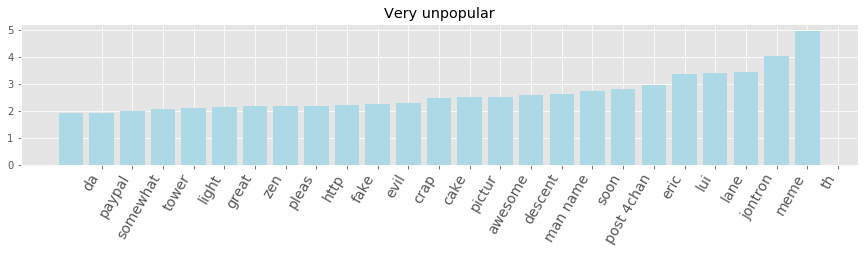

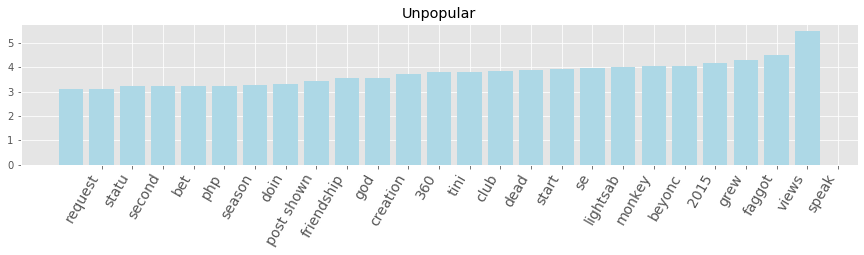

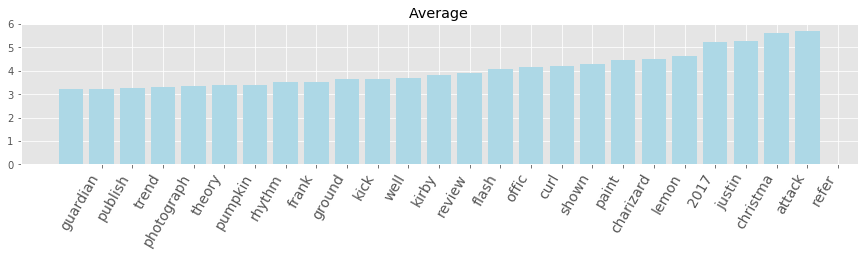

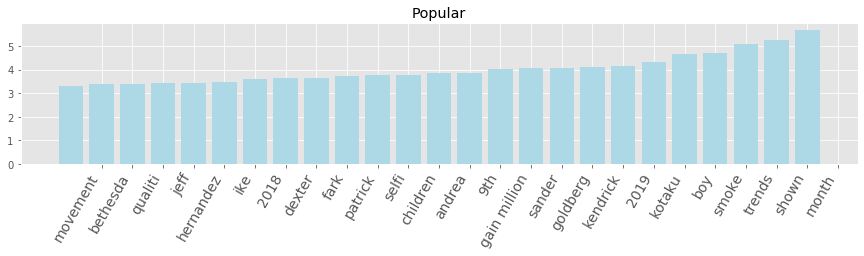

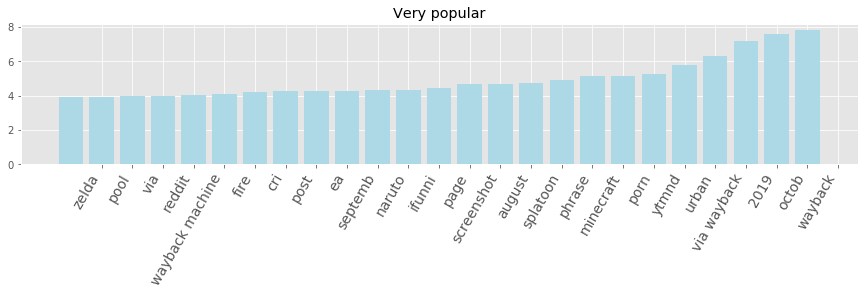

In [408]:
titles = ["Very unpopular", "Unpopular", 'Average', 'Popular', 'Very popular']
for i in range(5):
    visualize_coefficients(logit_sgd.coef_[i,:], tf_vectorizer.get_feature_names(),
                      title=titles[i], plot_num=i)

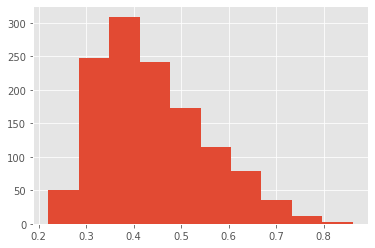

In [409]:
plt.hist(np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1));

In [397]:
predictions = logit_sgd.predict(Xval_tfidf)
certainty_mask = np.max(logit_sgd.predict_proba(Xval_tfidf), axis=1)>0.6

In [398]:
meme_slice = memes.loc[Xval.index[certainty_mask]]
meme_slice['actual_popularity'] = le.inverse_transform(predictions[certainty_mask])

In [399]:
meme_slice[
    ['name', 'origin_year', 'date_added', 'views', 'description', 'average_views', 'actual_popularity']
].sort_values(by='views', ascending=False)

,name,origin_year,date_added,views,description,average_views,actual_popularity
1488,Big Smoke's Order,2004.0,2019-08-14T07:37:57-04:00,1041655,"big smoke, grand theft auto, san andreas, fast...",12352.075989,"(39.263, 206.357]"
1135,Twitch Emotes,2015.0,2019-09-23T08:42:37-04:00,374437,"emote, twitch, huwarf, fivethirtyeight, franke...",8455.079225,"(206.357, 536753.118]"
2097,/pol/,2011.0,2018-03-11T07:30:52-04:00,344744,"pol, 4chan, polit incorrect, politics, 4chan b...",569.509184,"(206.357, 536753.118]"
2093,/b/,2004.0,2019-04-30T10:15:11-04:00,301270,"4chan, board, 4chan board, random, /b/, new /b...",1583.787975,"(206.357, 536753.118]"
4178,Crabcore,2008.0,2018-06-25T14:09:53-04:00,242035,"crabcore, attack attack, music, screamo, scene...",484.983532,"(11.488, 39.263]"
3553,"Dammit Jim, I'm a Doctor, Not a X",1966.0,2011-01-29T23:44:27-05:00,168372,"damn damm jim i'm doctor star trek dammit jim,...",52.573247,"(1.794, 11.488]"
4139,Bitches and Whores,2008.0,2019-04-11T06:40:13-04:00,161368,"catchphrase, 4chan, comic, insult, persona, mi...",770.729580,"(206.357, 536753.118]"
1647,Help i accidentally build a shelf!,2013.0,2016-07-26T02:36:54-04:00,119064,"""help accident build shelf"" googl search sen...",99.340913,"(0.096, 1.794]"
439,"Lucifersexdoll / What's New, Scooby-Doo?",2018.0,2019-04-11T04:18:11-04:00,118399,"tiktok, instagram, scoobi doo, goth, lucifer, ...",565.233765,"(206.357, 536753.118]"
4205,I Believe You Have My Stapler,2004.0,2018-04-09T16:28:49-04:00,109512,"movie, catchphrase, film, offic space, movi qu...",190.137642,"(206.357, 536753.118]"


### А теперь можно взглянуть на confusion matrix и посмотреть, где же косячат модели

In [400]:
def plot_confusion(predictions, yval, title):
    array = confusion_matrix(yval, predictions)
    df_cm = pd.DataFrame(array, index = [i for i in titles],
                      columns = [i for i in titles])
    plt.figure(figsize = (7,7))
    sn.heatmap(df_cm, annot=True, fmt='g', cbar=False)
    plt.title(title);

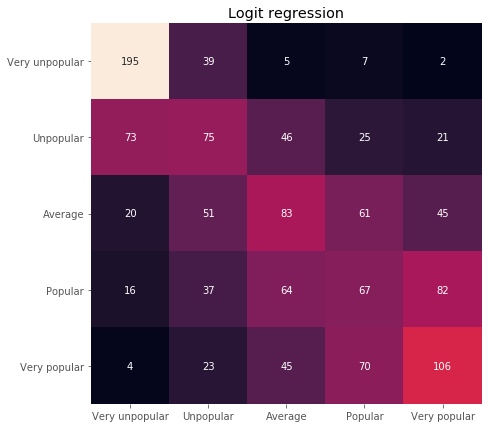

In [401]:
plot_confusion(logit_sgd.predict(Xval_tfidf), yval_quantile, "Logit regression")